In [1]:
from tqdm import tqdm

# %matplotlib notebook
from keithley2600 import Keithley2600
from pmu_som import pmu_ctrl,  pmu_calc, pmu_def,pmu_calc_jub,pmu_def_jub ,pmu_cal,pmu_cal_jub
from time import sleep
import numpy as np
from matplotlib import pyplot as plt


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()

k.smua.measure.nplc = 3  # 0.001 to 25
k.smub.measure.nplc = 25  # 0.001 to 25

# k.smua.source.highc = k.smua.ENABLE
# k.smua.sense = k.smua.SENSE_REMOTE
k.smua.source.output = k.smua.OUTPUT_OFF
k.smub.source.output = k.smub.OUTPUT_OFF

k.display.screen = k.display.USER
k.display.clear()
k.display.settext("Ready to do $BStuff$N")
k.display.settext("ctrl from calibrate.ipynb")

k.beeper.enable = k.beeper.ON
#k.play_chord(notes=("G5", "F5", "C5", "C5"), durations=0.1)
# k.beeper.enable = k.beeper.OFF
p.change_sys_ctrl({
    "DUTGND/CH": 1,
    "INT10K": 1,
    "GAIN": 0b10,
    "TMP ENABLE": 1,
    "TMP": 0b11
})

pmu_ch = p.channels[0]

In [2]:
LSB_SIZE_V = 4.5 * pmu_def.VREF / (2**16)
print(LSB_SIZE_V)

0.00033988952636718753


In [2]:
pmu_ch.write_dac(data = 0x8000, dac_reg = "FIN_U", reg = "C")
pmu_ch.write_dac(0x8000, dac_reg = "FIN_U")

sleep(0.5)

In [3]:
pmu_ch.write_dac(data = 0xFFFF, dac_reg = "FIN_U", reg = "M")
pmu_ch.write_dac(0x8000, dac_reg = "FIN_U")
sleep(0.5)

In [3]:
pmu_cal.calibrate(p, k, max_iterations=20, accuracy=1, reset_pmu=True, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)


FIN_U_M CALIBRATION for channel 0
	NEW_FIN_M = FIN_U_M * (V_HIGH_SET / V_HIGH_MEAS)
	64869 = 65535 * (11.137 V / 11.252 V)
	V_MAX after Cal = 11.022 V
FIN_U_C CALIBRATION for channel 0
	NEW_FIN_C = FIN_C - (Zero_offset / LSB)
	33070 = 32768 - (-102.726 mV / 339.890 µV)
	Offset after Cal = 829.251 µV
FIN_U_M CALIBRATION for channel 0
	NEW_FIN_M = FIN_U_M * (V_HIGH_SET / V_HIGH_MEAS)
	64935 = 64868 * (11.137 V / 11.126 V)
	V_MAX after Cal = 11.148 V
FIN_U_C CALIBRATION for channel 0
	NEW_FIN_C = FIN_C - (Zero_offset / LSB)
	33034 = 33070 - (12.156 mV / 339.890 µV)
	Offset after Cal = -208.490 µV
FIN_U_M CALIBRATION for channel 0
	NEW_FIN_M = FIN_U_M * (V_HIGH_SET / V_HIGH_MEAS)
	64940 = 64934 * (11.137 V / 11.136 V)
	V_MAX after Cal = 11.138 V
FIN_U_C CALIBRATION for channel 0
	NEW_FIN_C = FIN_C - (Zero_offset / LSB)
	33032 = 33034 - (836.699 µV / 339.890 µV)
	Offset after Cal = 151.832 µV
FIN_U_M CALIBRATION for channel 0
	NEW_FIN_M = FIN_U_M * (V_HIGH_SET / V_HIGH_MEAS)
	64937 = 64940 

KeyboardInterrupt: 

In [ ]:
new_offset_ju = pmu_cal_jub.calibrate_jub(p, k, reset_pmu=True, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)


In [2]:
new_offset_ju = pmu_cal_jub.test_calibrate_jub_FIN_I_M(p,k,reset_pmu=True,wait_before_measure=0.5,measure_delay=0.1,measure_count=5)

FIN_U_M CALIBRATION for channel 0

FIN_U_M 65535

slope_Max 0.0003430109439374981

slope_Ideal 0.00033988952636718753

slope_Min 0.00017156206976531266
[64938.44029659]

Offset after Interpolation [64938.44029659]
	V_MAX after Cal = 11.046 V
FIN_U_C CALIBRATION for channel 0
	NEW_FIN_C , FIN_C 
	65535 = 32768 )
	Offset after Cal = 11.149 V

dacc_zero 65535

dac_one 32768

volt_zero 11.149179999999998

volt_one -0.09070685999999999

v_req 7.5531005859375e-05
The offset for output voltage 7.5531005859375e-05 is approximately 33033.000000000000000.
	Offset after Cal = 139.847 µV
FIN_U_M CALIBRATION for channel 1

FIN_U_M 65535

slope_Max 0.0003431448658528398

slope_Ideal 0.00033988952636718753

slope_Min 0.0001716293258888516
[64913.08720453]

Offset after Interpolation [64913.08720453]
	V_MAX after Cal = 11.031 V
FIN_U_C CALIBRATION for channel 1
	NEW_FIN_C , FIN_C 
	65535 = 32768 )
	Offset after Cal = 11.139 V

dacc_zero 65535

dac_one 32768

volt_zero 11.138519999999998

volt_one -0.1

In [3]:

# Interpolation
import numpy as np
 
# Known x and y values
x = np.array([ 0.0116728, 11.13716])
y = np.array([32768,65204])
 
# Fit a linear line to the known data points
model = np.polyfit(x, y, 1)
 
# New x values for which to extrapolate the y values
new_x = np.array([ 11.137235641479492])
 
# Extrapolate the y values for the new x values
new_y = np.polyval(model, new_x)
 
print(new_y)

[65204.2205303]


In [3]:
#Extrapolation
import numpy as np

# Given data points (just two points)
x = np.array([11.137379999999999, 11.25090])
y = np.array([65205, 655350])

# New x value for interpolation
new_x = 11.137235641479492

# Perform linear interpolation using numpy.interp
new_y = np.interp(new_x, x, y)

print(f"For x = {new_x}, interpolated y = {new_y}")


For x = 11.137235641479492, interpolated y = 65205.0


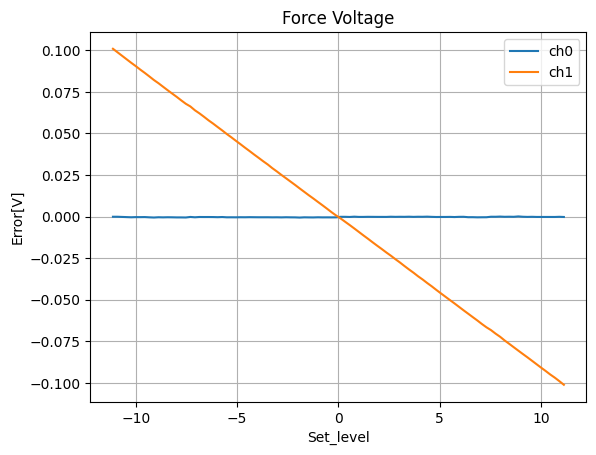

In [5]:
# FV and FI-Error
p.write_all_PMU_REGS(0x1E060)
measure_delay = 0.1

points = 100

for ch in range(2):
# for ch in [0]:    
    o, m = pmu_cal.measureFV(p, k, ch, points, measure_delay=measure_delay)

    # if ch != 3:
    #     plt.plot(o, (o-m), label="ch%i"%ch)
    plt.plot(o, (o-m), label="ch%i"%ch)

plt.title("Force Voltage")
plt.legend()
plt.xlabel("Set_level")
# axs[1].set_ylabel("Error (%)")
plt.ylabel("Error[V]")
plt.grid()
plt.show()


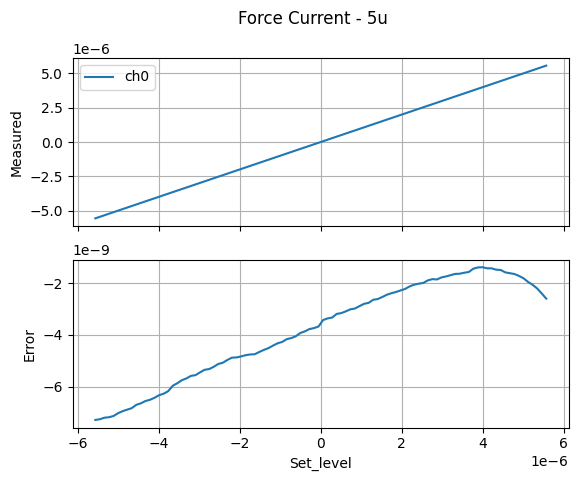

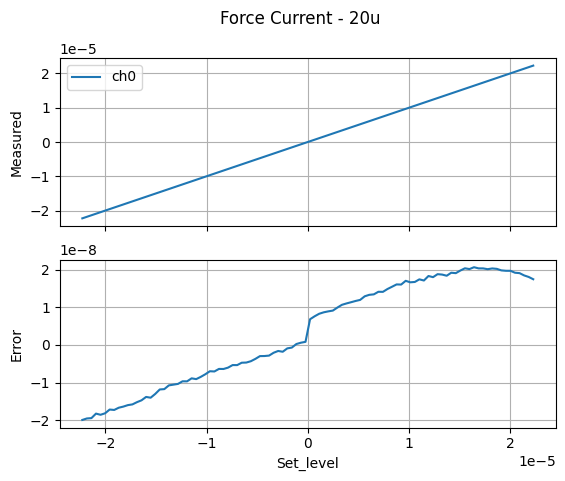

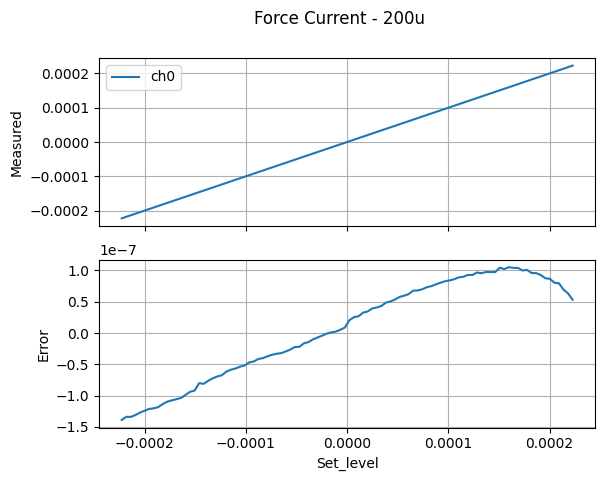

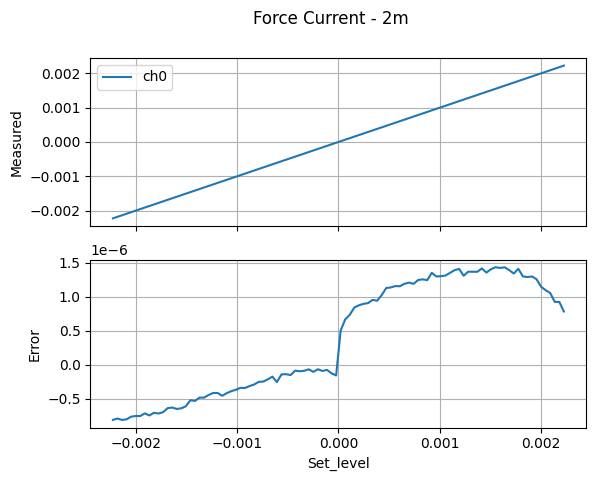

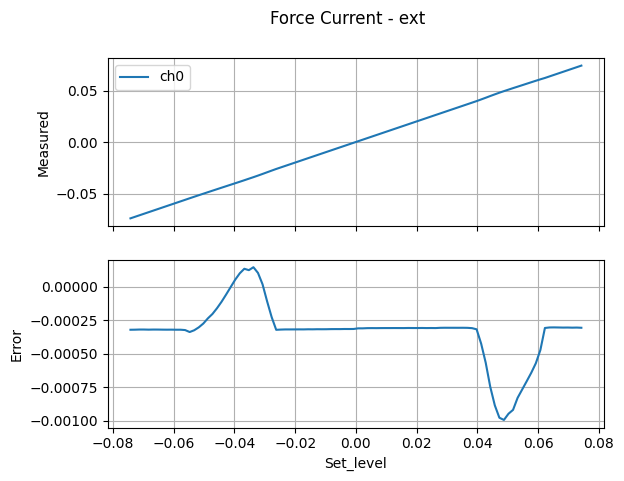

In [3]:
# FV and FI-Error with raw force voltage
p.write_all_PMU_REGS(0x1E060)
p.c.verbose = False

points = 100

# # print("Measure FV")

# fig, axs = plt.subplots(2, sharex=True)
# fig.suptitle("Force Voltage")
# for ch in range(1):
# # for ch in [0]:
    
#     o, m = pmu_cal.measureFV(p, k, ch, points)
#     axs[0].plot(o, m, label="ch%i"%ch)
#     # axs[1].plot(o, (o-m)/o*100)
#     if ch != 3:
#         axs[1].plot(o, (o-m), label="ch%i"%ch)

# axs[0].set_ylabel("Measured")
# axs[0].grid(visible=True)
# axs[0].legend()
# axs[1].set_xlabel("Set_level")
# # axs[1].set_ylabel("Error (%)")
# axs[1].set_ylabel("Error")
# # axs[1].set_ylim([-1, 1])
# axs[1].grid(visible=True)
# plt.show()

for i_range in pmu_def.I_RANGES:
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle("Force Current - %s" % i_range)
    
    for ch in range(1):
    # for ch in [0]:
        o, m = pmu_cal.measureFI(p, k, ch, i_range, points)
        axs[0].plot(o, -m, label="ch%i"%ch)
        # axs[1].plot(o, (o-m)/o*100)
        axs[1].plot(o, (o+m), label="ch%i"%ch)

    axs[0].set_ylabel("Measured")
    axs[0].grid(visible=True)
    axs[0].legend()
    axs[1].set_xlabel("Set_level")
    # axs[1].set_ylabel("Error (%)")
    axs[1].set_ylabel("Error")
    # axs[1].set_ylim([-1, 1])
    axs[1].grid(visible=True)
    plt.show()

In [3]:
p.reset()

In [5]:
ch = 1
dac_one = pmu_ch.read_dac("FIN_U","M")
print(dac_one)

65535


In [3]:
dac_zero = pmu_ch.read_dac("FIN_U","C")
print(dac_zero)

33032


In [3]:
pmu_ch.write_dac(data = 64945, dac_reg = "FIN_U", reg = "M")
pmu_ch.write_dac(64942, dac_reg = "FIN_U")
sleep(0.5)

In [4]:
pmu_ch.write_dac(data = 33033, dac_reg = "FIN_U", reg = "C")
pmu_ch.write_dac(0x8000, dac_reg = "FIN_U")
sleep(0.5)

In [ ]:
p.change_sys_ctrl({
    "DUTGND/CH" : 1,
    "INT10K"    : 1,
    "GAIN"      : 0b10,
    "TMP ENABLE": 1,
    "TMP"       : 0b11
})

In [ ]:
from tqdm import tqdm

# %matplotlib notebook
from keithley2600 import Keithley2600
from pmu_som import pmu_ctrl, pmu_cal, pmu_calc, pmu_def,pmu_calc_jub,pmu_def_jub, pmu_cal_jub
from time import sleep
import numpy as np
from matplotlib import pyplot as plt

try:
    del(p.c)
except:
    pass
p = pmu_ctrl.pmu()



In [ ]:


from tqdm import tqdm

from pmu_som import pmu_ctrl, pmu_cal, pmu_calc, pmu_def,pmu_cal_jub
from time import sleep

import numpy as np
import pmu_def_jub
from matplotlib import pyplot as plt

%matplotlib notebook

try:
    p.c.s.close()
except NameError:
    pass
finally:
    p = pmu_ctrl.pmu()
    

In [ ]:
import pmu_calc_jub
import pmu_def_jub
import pmu_cal_jub

In [ ]:
ch = 0
pmu_ch = p.channels[ch]

OFFSET = pmu_ch.read_dac("Offset")


In [ ]:
print(OFFSET)

In [ ]:
p.reset()

In [ ]:
pmu_ch.write_dac(data = 32256,dac_reg = "FIN_U", reg ="C")

In [ ]:
pmu_ch.pmu_reg = 0x21fc60

In [ ]:
FIN_U_C = pmu_ch.read_dac("FIN_U","C")
print(FIN_U_C)


In [ ]:
pmu_reg_channel_on_sys = 0x1E060

pmu_ch.pmu_reg = pmu_reg_channel_on_sys
    

In [ ]:
import pmu_def_jub


LSB_SIZE_V = 4.5 * pmu_def_jub.VREF / (2**16)
print(LSB_SIZE_V)

In [ ]:
pmu_cal.measure(k, meas_delay=0.1, meas_count=5, meas_func='v')

In [ ]:
pmu_cal_jub.measure_jub





In [ ]:
 pmu_cal_jub.cal_jub_FIN_U_C(p, k, 0, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)


In [ ]:
pmu_cal.cal_FIN_U_C(p, k, 0, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)


In [ ]:
channel= 0
pmu_ch = p.channels[channel]
pmu_ch.write_dac(data = 0xFFFF,dac_reg="FIN_U",reg="M")

In [ ]:
pmu_cal_jub.cal_jub_FIN_U_M(p, k, 0, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)

In [ ]:
pmu_cal.cal_FIN_U_M(p, k, 0, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)

In [ ]:
channel= 0
pmu_ch = p.channels[channel]
pmu_ch.write_dac(data = 32733,dac_reg="FIN_I_2m",reg="C")

In [ ]:
pmu_cal_jub.cal_jub_FIN_I_C(p, k, 0, "2m", wait_before_measure=0.5, measure_delay=0.1, measure_count=5)

In [ ]:
pmu_cal.cal_FIN_I_C(p,k,0,"2m", wait_before_measure=0.5, measure_delay=0.1, measure_count= 5)

In [ ]:
new_offset_ju = pmu_cal_jub.calibrate_jub(p, k, reset_pmu=True, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)


FIN_U_C CALIBRATION for channel 0
32768
0
-11.2279
	NEW_FIN_C = FIN_C - (Zero_offset / LSB)
	0 = 32768 - (-11.137 V / 339.890 µV)
-11.2275
x_zero_c,y_zero_c,x_one_c,y_one_c,y_required_c

0 -11.2275 32768 -11.2279 -11.13742446899414
FIN_U_M CALIBRATION for channel 0
dac_one 65535
32768
volt_required 11.137235641479492
volt_one 0.01147966
volt_zero -11.227720000000001

x_zero_m,y_zero_m,x_one_m,y_one_m,y_required_m

32768 -11.227720000000001 65535 0.01147966 11.137235641479492
	m_c =  -1.220703125002576e-08
	b_c = -11.2275
x_required_c	
-7378987.499984358


In [ ]:
pmu_cal.calibrate(p, k, max_iterations=20, accuracy=1, reset_pmu=True, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)


FIN_U_M CALIBRATION for channel 0
	NEW_FIN_M = FIN_U_M * (V_HIGH_SET / V_HIGH_MEAS)
	64873 = 65535 * (11.137 V / 11.251 V)
	V_MAX after Cal = 11.023 V
FIN_U_C CALIBRATION for channel 0

dac_one 32768

X1_value 32768

v_required 7.5531005859375e-05

volt_one -0.1020486

dac_zero  33068
	NEW_FIN_C = FIN_C - (Zero_offset / LSB)
	33068 = 32768 - (-102.049 mV / 339.890 µV)
	Offset after Cal = 839.777 µV

volt_zero 0.0008397772000000002


{'0FIN_U_M': 65535, '0FIN_U_C': 32768}

In [ ]:
print(new_offset_ju)

In [ ]:
p.reset()

In [ ]:
pmu_ch.write_dac(data = 32733,dac_reg="FIN_U",reg="C")

In [ ]:
pmu_cal.calibrate(p, k, max_iterations=20, accuracy=1, reset_pmu=True, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)

In [ ]:
# FV and FI-Error with raw force voltage
p.write_all_PMU_REGS(0x1E060)
p.c.verbose = False

points = 100

# print("Measure FV")

fig, axs = plt.subplots(2, sharex=True)
fig.suptitle("Force Voltage")
for ch in range(1):
# for ch in [0]:
    
    o, m = pmu_cal.measureFV(p, k, ch, points)
    print(o)
    print(m)
    axs[0].plot(o, m, label="ch%i"%ch)
    # axs[1].plot(o, (o-m)/o*100)
    if ch != 3:
        axs[1].plot(o, (o-m), label="ch%i"%ch)

axs[0].set_ylabel("Measured")
axs[0].grid(visible=True)
axs[0].legend()
axs[1].set_xlabel("Set_level")
# axs[1].set_ylabel("Error (%)")
axs[1].set_ylabel("Error")
# axs[1].set_ylim([-1, 1])
axs[1].grid(visible=True)
plt.show()

In [ ]:
channel= 0
pmu_ch = p.channels[channel]
pmu_ch.read_dac(dac_reg="FIN_U",reg="C")

In [ ]:
channel= 0
pmu_ch = p.channels[channel]
pmu_ch.write_dac(data = 0x8000,dac_reg="FIN_I_2m",reg="C")

channel= 0
pmu_ch = p.channels[channel]
pmu_ch.write_dac(data = 0x8000,dac_reg="FIN_I_2m",reg="C")

In [ ]:
pmu_cal_jub.calibrate_jub(p, k, reset_pmu=True, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)


In [ ]:
pmu_cal_jub.cal_jub_FIN_I_M(p, k, 0, "2m", wait_before_measure=0.5, measure_delay=0.1, measure_count=5)

In [ ]:
channel= 0
pmu_ch = p.channels[channel]
pmu_ch.write_dac(data = 0x8000,dac_reg="CLL_U",reg="C")

In [2]:
pmu_cal.cal_CL_U_C(p, k, 0, "2m", 'L', current_factor=0.5, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)


CLL_U_C CALIBRATION for channel 0 @ 2mA
	NEW_CLL_U_C = CLL_U_C - (Zero_offset / LSB)
	32886 = 32768 - (-40.173 mV / 339.890 µV)
	Offset after Cal = 273.504 µV


32886

In [ ]:
pmu_cal_jub.cal_jub_CL_U_C(p, k, 0, "2m", 'L', current_range_factor=0.5, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)

In [2]:
pmu_cal.measureCL_U(p, k, 0,  "2m", current_range_factor=0.5, clamp_side='H', overlap=0.5, num=100, measure_delay=0.1)

(array([-5.56867447e+00, -5.39992790e+00, -5.23118134e+00, -5.06243477e+00,
        -4.89368820e+00, -4.72494164e+00, -4.55619507e+00, -4.38744850e+00,
        -4.21870193e+00, -4.04995537e+00, -3.88120880e+00, -3.71246223e+00,
        -3.54371567e+00, -3.37496910e+00, -3.20622253e+00, -3.03747597e+00,
        -2.86872940e+00, -2.69998283e+00, -2.53123627e+00, -2.36248970e+00,
        -2.19374313e+00, -2.02499657e+00, -1.85625000e+00, -1.68750343e+00,
        -1.51875687e+00, -1.35001030e+00, -1.18126373e+00, -1.01251717e+00,
        -8.43770599e-01, -6.75024033e-01, -5.06277466e-01, -3.37530899e-01,
        -1.68784332e-01, -3.77655029e-05,  1.68708801e-01,  3.37455368e-01,
         5.06201935e-01,  6.74948502e-01,  8.43695068e-01,  1.01244164e+00,
         1.18118820e+00,  1.34993477e+00,  1.51868134e+00,  1.68742790e+00,
         1.85617447e+00,  2.02492104e+00,  2.19366760e+00,  2.36241417e+00,
         2.53116074e+00,  2.69990730e+00,  2.86865387e+00,  3.03740044e+00,
         3.2

In [ ]:
pmu_cal_jub.calibrate_jub(p, k, reset_pmu=True, wait_before_measure=0.5, measure_delay=0.1, measure_count=5)

FIN_U_C CALIBRATION for channel 0
32768
-11.13742446899414
0
0.01184862
0.0118293
	Output Voltage after Calibration = 11.829 mv
x_zero_c,y_zero_c,x_one_c,y_one_c,y_required_c

0 0.01184862 32768 0.0118293 7.5531005859375e-05
FIN_U_M CALIBRATION for channel 0
	NEW_FIN_U_M = FIN_U_M * (Zero_offset_output for 0xFFFF.....Expected Value Value/Zero_Offset_output for 0xFFFF......Measured Value)
	0 = 65535 * (11.137 V/11.251 V)
V_MAX after Calibration = -11.227 V

x_zero_m,y_zero_m,x_one_m,y_one_m,y_required_m

0 -11.227239999999998 65535 11.25106 11.137235641479492
x_required_c	
19967938.93167548


In [ ]:


dac_zero = pmu_calc_jub.v_to_dac(0,OFFSET)
v_zero = pmu_calc_jub.dac_to_v(dac_zero ,OFFSET)
print(dac_zero)
print(v_zero)

In [ ]:
p.read_dac_regs(reg = "X1")



In [ ]:
p.read_dac_regs(reg ="M")

In [ ]:
p.read_dac_regs(reg = "C")

In [ ]:
p.decode_pmu_reg()



In [ ]:
p.decode_pmu_reg()




In [ ]:

p.change_sys_ctrl({
    "DUTGND/CH" : 1,
    "INT10K"    : 1,
    "GAIN"      : 0b10,
    "TMP ENABLE": 1,
    "TMP"       : 0b11
})

In [ ]:
p.decode_sys_ctrl()

In [ ]:
p.decode_pmu_reg()

In [ ]:
p.read_dac_regs(reg="X1")

In [ ]:
p.read_dac_regs(reg="C")

In [ ]:
p.read_dac_regs(reg="M")

In [ ]:
p.channels[0].decode_pmu_reg()

In [ ]:
## enable the PMU
p.channels[0].change_pmu_reg({
    "CH EN" : 1, # enable the channel
    "FORCE" : 0, # force voltage clamp current
    "C"     : 3, # 2mA Current range
    "FIN"   : 1, # connect force amp to DAC output
    "MEAS"  : 3, # MEASOUT = High Z
    "CL"    : 1, # Enable Clamp
})

In [ ]:
## disable the PMU
p.channels[0].change_pmu_reg({
    "CH EN" : 0 # disable the channel
})

In [ ]:
p.channels[0].write_dac(
    data=0x0008,
    dac_reg="FIN_U",
    reg="X1"
)

In [ ]:
p.channels[ch].read_dac(
    data=offset_1,
    dac_reg="FIN_U",
    reg="C"
)

In [ ]:
import matplotlib.pyplot as plt

# Your data points
data_points = [-1.11375000e-03, -7.42507553e-04, -3.71265106e-04, -2.26593018e-08,
               3.71219788e-04,  7.42462234e-04,  1.11370468e-03,  1.48494713e-03,
               1.85618958e-03,  2.22743202e-03]

# Generating x-values (assuming they are sequential)
x_values = range(1, len(data_points) + 1)

# Creating the plot
plt.plot(x_values, data_points, marker='o', linestyle='-')

# Adding title and labels
plt.title('Line Plot of Data Points')
plt.xlabel('Index')
plt.ylabel('Values')

# Displaying the plot
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Your data points
data_points = [ 0.00098938,  0.00061318,  0.00023683, -0.00014016, -0.00051747,
        -0.00089462, -0.00127082, -0.00164803, -0.00202506, -0.00240244]

# Generating x-values (assuming they are sequential)
x_values = range(1, len(data_points) + 1)

# Creating the plot
plt.plot(x_values, data_points, marker='o', linestyle='-')

# Adding title and labels
plt.title('Line Plot of Data Points')
plt.xlabel('Index')
plt.ylabel('Values')

# Displaying the plot
plt.grid(True)
plt.show()

In [ ]:
# Your data points
data_points = [-1.11375000e-03, -7.42507553e-04, -3.71265106e-04, -2.26593018e-08,
               3.71219788e-04,  7.42462234e-04,  1.11370468e-03,  1.48494713e-03,
               1.85618958e-03,  2.22743202e-03]

# Calculate the differences between consecutive values
differences = [data_points[i] - data_points[i-1] for i in range(1, len(data_points))]

# Print the differences
print("Differences between consecutive values:", differences)


In [ ]:
data_points = [0.00098938,  0.00061318,  0.00023683, -0.00014016, -0.00051747,
        -0.00089462, -0.00127082, -0.00164803, -0.00202506, -0.00240244]

# Calculate the differences between consecutive values
differences = [data_points[i] - data_points[i-1] for i in range(1, len(data_points))]

# Print the differences
print("Differences between consecutive values:", differences)


In [ ]:
from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


k = Keithley2600('GPIB0::17::INSTR', visa_library='')
p = pmu_ctrl.pmu()

def j_measurement_FV_2(p,k):

   

    k.smua.reset()
    k.smub.reset()
    measure_delay = 0.1
    offset_2= 32742
    sleep(measure_delay)

    # p = communicator.communicator(False)

    ### all channels of PMU turnoff

    for channel in p.channels:
        channel.change_pmu_reg({"CH EN": 0})
    p.decode_pmu_reg()

    ## SMU and PMU Setup

    p.write_all_PMU_REGS(0x1E060)
    sleep(0.5)

    k.display.screen = k.display.SMUA
    k.display.smua.measure.func = k.display.MEASURE_DCVOLTS

    k.smua.measure.rangev = 20
    k.smua.measure.autorangei = k.smua.AUTORANGE_ON
    # k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
    k.smua.measure.nplc = 1
    k.smua.source.func = k.smua.OUTPUT_DCAMPS
    k.smua.source.leveli = 0
    k.smua.source.limiti = 1e-3
    k.smua.source.limitv = 20
    k.smua.source.output = k.smua.OUTPUT_ON

    p.change_sys_ctrl({
        "DUTGND/CH": 1,
        "INT10K": 1,
        "GAIN": 2,
        "TMP ENABLE": 1,
        "TMP": 3  # Thermal shutdown at 100°C
    })

    p.decode_pmu_reg()

    for ch in range(4):
        p.channels[ch].change_pmu_reg({
            "SS0": 0,
            "SF0": 0  # 1,1
        })
        
        p.channels[ch].write_dac(
            data = offset_2,
            dac_reg="FIN_U",
            reg="C"
        )
        sleep(0.5)

    import matplotlib.pyplot as plt

    # Initialize an empty list to store individual DataFrames
    all_dataframes = []

    # Add for loop for ch
    for ch in range(1):
        print(ch)

        #  p.write_all_PMU_REGS(0x21fc60)

        # p.channels[ch].change_pmu_reg = 0x21fc60

        # Change PMU register settings for the current channel
        p_ch = p.channels[ch]
        p_ch.pmu_reg = 0x21fc60

        # Enable beeper and play chord
        k.beeper.enable = k.beeper.ON
        k.beeper.beep(0.5,500)
        k.beeper.enable = k.beeper.OFF
        k.smua.source.output = k.smua.OUTPUT_ON

        data_list = []
        measure_points = np.linspace(0, 0x8000, 10)

        # Calculate the step size to generate 20 equidistant data points
        # step_size = 0xFFFF // 19

        # Loop to generate and write equidistant data points
        for d in measure_points:
            # Calculate the data value for the current index
            # data = i * step_size

            # Print the data being written to the DAC register
            #print(f"Writing data {d }: {(d)}")

            # Write the data to the DAC register
            p.channels[ch].write_dac(
                data=round(d),
                dac_reg="FIN_U",
                reg="X1"
            )

            # Perform measurement after writing to the DAC register
            sleep(measure_delay)

            iv_data = k.smua.measure.v()
            V_REF = 5

            # Print the measurement outputs
            #print(f"Measurement outputs : {iv_data}")

            # Calculate expected output and error
            VOUT = ((4.5 * d) - (3.5 * 42130)) * (V_REF / (2 ** 16))
            error = VOUT - iv_data
            #print(f"Expected Output : {VOUT}")

            # Append data to the list
            data_list.append({"CODE": (d), "VOUT - EXPECTED": VOUT, "VOUT-RESULT": iv_data, "Error": error})

        # Create a DataFrame for the current channel
        data_df = pd.DataFrame(data_list)

        # Append the DataFrame to the list of all DataFrames
        all_dataframes.append(data_df)

        # Display the DataFrame
        #print("\nData stored in DataFrame:")
        #print(data_df)

        # Plot the data for the current channel
        #plt.plot(data_df.index, data_df["Error"], label=f"Channel {ch} Data", linestyle='-')

        # Add legend and labels
        #plt.xlabel("CODE")
        #plt.ylabel("Error")
        #plt.title(f"Error vs CODE Plot for Channel {ch}")
        #plt.legend()

        # Show the plot
        #plt.show()
        k.smua.source.output = k.smua.OUTPUT_OFF
        p.channels[ch].change_pmu_reg({
            "CH EN": 0
        })

        # Change PMU register settings for the current channel
        p.channels[ch].change_pmu_reg({
            "SS0": 0,
            "SF0": 0,
        })

        sleep(measure_delay)
        #p.c.s.close()

    # Concatenate all individual DataFrames into a single DataFrame
    all_data_df = pd.concat(all_dataframes)
    
    
   
   
    #print(offset_2)

    # Display the new DataFrame
    #print("\nNew DataFrame containing values of all four previous DataFrames:")
    #print(all_data_df)

    # Plot comparing all the other four plots
    #for df in all_dataframes:
        #plt.plot(df.index, df["Error"], linestyle='-')

    # Add legend and labels
   # plt.xlabel("CODE")
    #plt.ylabel("Error")
    #plt.title("Comparison of Error vs CODE Plots for All Channels")
    #plt.legend([f"Channel {i}" for i in range(4)])

    # Extracting the error values to a separate dataframe called error1
    error_2 = all_data_df[["Error"]]
    k.beeper.enable = k.beeper.ON
    k.beeper.beep(0.5,1000)
    k.beeper.enable = k.beeper.OFF
    return error_2, offset_2

if __name__ == "__main__":
    error_2, offset_2 = j_measurement_FV_2(p,k)
   # print(error_2)

def calculate_common_difference(series):
    differences = np.diff(series)
    #common_difference = np.mean(differences)
    return differences

def calculate_common_ratio(series):
    ratios = series[1:] / series[:-1]
    #common_ratio = np.mean(ratios)
    return ratios

def calculate_percentage_change(series):
    first_value = series[0]
    percentage_change = ((series - first_value) / first_value) * 100
    return percentage_change

def calculate_percentage_change_single_value(value, first_value):
    percentage_change = ((value - first_value) / first_value) * 100
    return percentage_change

# Initialize instruments
k = Keithley2600('GPIB0::17::INSTR', visa_library='')
p = pmu_ctrl.pmu()

# Call the functions
error_1, offset_1 = j_measurement_FV_1(p, k)
error_2, offset_2 = j_measurement_FV_2(p, k)

# Calculate common difference and common ratio for error_1
error_1_values = error_1['Error'].values
common_diff_1 = calculate_common_difference(error_1_values)
common_ratio_1 = calculate_common_ratio(error_1_values)

# Calculate common difference and common ratio for error_2
error_2_values = error_2['Error'].values
common_diff_2 = calculate_common_difference(error_2_values)
common_ratio_2 =calculate_common_ratio(error_2_values)

# Calculate percentage change for error_1 and error_2
error_1['Percentage Change'] = calculate_percentage_change(error_1['Error'])
error_2['Percentage Change'] = calculate_percentage_change(error_2['Error'])

# Calculate percentage change for offset values
offset_percentage_change = calculate_percentage_change_single_value(offset_2, offset_1)

# Display the results
print("Error 1 DataFrame:")
print(error_1)
print("Offset 1:", offset_1)

print("\nError 2 DataFrame:")
print(error_2)
print("Offset 2:", offset_2)

print("\nCommon Difference and Common Ratio:")
print(f"Common Difference of Error 1: {common_diff_1}")
print(f"Common Ratio of Error 1: {common_ratio_1}")
print(f"Common Difference of Error 2: {common_diff_2}")
print(f"Common Ratio of Error 2: {common_ratio_2}")

print("\nPercentage Change of Offset Values:")
print(f"Percentage Change from Offset 1 to Offset 2: {offset_percentage_change:.4f}%")

# Plot the results to visualize the errors
plt.figure()
plt.plot(error_1.index, error_1_values, label='Error 1')
plt.plot(error_2.index, error_2_values, label='Error 2')
plt.xlabel("Index")
plt.ylabel("Error")
plt.title("Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()

# Plot percentage change for error_1 and error_2
plt.figure()
plt.plot(error_1.index, error_1['Percentage Change'], label='Error 1 Percentage Change')
plt.plot(error_2.index, error_2['Percentage Change'], label='Error 2 Percentage Change')
plt.xlabel("Index")
plt.ylabel("Percentage Change")
plt.title("Percentage Change of Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()

In [ ]:
from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
k = Keithley2600('GPIB0::17::INSTR', visa_library='')
p = pmu_ctrl.pmu()
k.smua.reset()
k.smub.reset()
measure_delay = 0.1
offset_2= 32768
sleep(measure_delay)

for channel in p.channels:
    channel.change_pmu_reg({"CH EN": 0})

p.write_all_PMU_REGS(0x1E060)
sleep(0.5)


k.display.screen = k.display.SMUA
k.display.smua.measure.func = k.display.MEASURE_DCVOLTS

k.smua.measure.rangev = 20
k.smua.measure.autorangei = k.smua.AUTORANGE_ON
# k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
k.smua.measure.nplc = 1
k.smua.source.func = k.smua.OUTPUT_DCAMPS
k.smua.source.leveli = 0
k.smua.source.limiti = 1e-3
k.smua.source.limitv = 20
k.smua.source.output = k.smua.OUTPUT_ON

p.change_sys_ctrl({
        "DUTGND/CH": 1,
        "INT10K": 1,
        "GAIN": 2,
        "TMP ENABLE": 1,
        "TMP": 3  # Thermal shutdown at 100°C
})

for ch in range(4):
        p.channels[ch].change_pmu_reg({
            "SS0": 0,
            "SF0": 0  # 1,1
        })
        
        # p.channels[ch].write_dac(
        #     data = offset_2,
        #     dac_reg="FIN_U",
        #     reg="C"
        # )
        # sleep(0.5) 

import matplotlib.pyplot as plt

    # Initialize an empty list to store individual DataFrames
all_dataframes = []

for ch in range(1):
    print(ch)
    p_ch = p.channels[ch]
    p_ch.pmu_reg = 0x21fc60
    p.channels[ch].write_dac(
        data = offset_2,
        dac_reg="FIN_U",
        reg="C"
    )
    sleep(0.5)
    

k.beeper.enable = k.beeper.ON
k.beeper.beep(0.5,500)
k.beeper.enable = k.beeper.OFF
k.smua.source.output = k.smua.OUTPUT_ON
    
data_list = []
measure_points = np.linspace(0, 0x8000, 10)

for d in measure_points:
    # Calculate the data value for the current index
    # data = i * step_size
    # Print the data being written to the DAC register
    #print(f"Writing data {d }: {(d)}")

    # Write the data to the DAC register
    p.channels[ch].write_dac(
        data=round(d),
        dac_reg="FIN_U",
        reg="X1"
    )
    # Perform measurement after writing to the DAC register
    sleep(measure_delay)

    iv_data = k.smua.measure.v()
    V_REF = 5

    # Print the measurement outputs
    #print(f"Measurement outputs : {iv_data}")

    # Calculate expected output and error
    VOUT = ((4.5 * d) - (3.5 * 42130)) * (V_REF / (2 ** 16))
    error = VOUT - iv_data
    #print(f"Expected Output : {VOUT}")

    # Append data to the list
    data_list.append({"CODE": (d), "VOUT - EXPECTED": VOUT, "VOUT-RESULT": iv_data, "Error": error})

data_df = pd.DataFrame(data_list)

# Append the DataFrame to the list of all DataFrames
all_dataframes.append(data_df)

        # Display the DataFrame
        #print("\nData stored in DataFrame:")
        #print(data_df)

        # Plot the data for the current channel
        #plt.plot(data_df.index, data_df["Error"], label=f"Channel {ch} Data", linestyle='-')

        # Add legend and labels
        #plt.xlabel("CODE")
        #plt.ylabel("Error")
        #plt.title(f"Error vs CODE Plot for Channel {ch}")
        #plt.legend()

        # Show the plot
        #plt.show()
k.smua.source.output = k.smua.OUTPUT_OFF
p.channels[ch].change_pmu_reg({
    "CH EN": 0
})

        # Change PMU register settings for the current channel
p.channels[ch].change_pmu_reg({
    "SS0": 0,
    "SF0": 0,
})

sleep(measure_delay)
        #p.c.s.close()

    # Concatenate all individual DataFrames into a single DataFrame
all_data_df = pd.concat(all_dataframes)
    
    
   
   
    #print(offset_2)

    # Display the new DataFrame
    #print("\nNew DataFrame containing values of all four previous DataFrames:")
    #print(all_data_df)

    # Plot comparing all the other four plots
    #for df in all_dataframes:
        #plt.plot(df.index, df["Error"], linestyle='-')

    # Add legend and labels
   # plt.xlabel("CODE")
    #plt.ylabel("Error")
    #plt.title("Comparison of Error vs CODE Plots for All Channels")
    #plt.legend([f"Channel {i}" for i in range(4)])

    # Extracting the error values to a separate dataframe called error1
error_2 = all_data_df[["Error"]]
k.beeper.enable = k.beeper.ON
k.beeper.beep(0.5,1000)
k.beeper.enable = k.beeper.OFF

print(error_2)

In [ ]:
from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from percentage_calculator import calculate_percentage

k.smua.reset()
k.smub.reset()
measure_delay = 0.1
sleep(measure_delay)


for channel in p.channels:
    channel.change_pmu_reg({"CH EN": 0})
   

    ## SMU and PMU Setup

    p.write_all_PMU_REGS(0x1E060)
    sleep(0.5)

    k.display.screen = k.display.SMUA
    k.display.smua.measure.func = k.display.MEASURE_DCVOLTS

    k.smua.measure.rangev = 20
    k.smua.measure.autorangei = k.smua.AUTORANGE_ON
    # k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
    k.smua.measure.nplc = 1
    k.smua.source.func = k.smua.OUTPUT_DCAMPS
    k.smua.source.leveli = 0
    k.smua.source.limiti = 1e-3
    k.smua.source.limitv = 20
    k.smua.source.output = k.smua.OUTPUT_ON
    
    p.change_sys_ctrl({
        "DUTGND/CH": 1,
        "INT10K": 1,
        "GAIN": 2,
        "TMP ENABLE": 1,
        "TMP": 3  # Thermal shutdown at 100°C
    })
    for ch in range(4):
        p.channels[ch].change_pmu_reg({
            "SS0": 0,
            "SF0": 0  # 1,1
        })
        
    


In [ ]:
from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
k.smua.source.output = k.smua.OUTPUT_ON

k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()

#print(k.query("*IDN?"))


In [ ]:
# FV Full program

from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
#k.smua.source.output = k.smua.OUTPUT_OFF

k.smua.reset()
k.smub.reset()
measure_delay = 0.1

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()

### all channels of PMU turnoff

for channel in p.channels:
    channel.change_pmu_reg({"CH EN": 0})
p.decode_pmu_reg()

## SMU and PMU Setup

p.write_all_PMU_REGS(0x1E060)

k.display.screen            = k.display.SMUA
k.display.smua.measure.func = k.display.MEASURE_DCVOLTS
    
k.smua.measure.rangev       = 20
k.smua.measure.autorangei   = k.smua.AUTORANGE_ON
#k.smua.measure.autorangev   = k.smua.AUTORANGE_ON
k.smua.measure.nplc         = 1    
k.smua.source.func          = k.smua.OUTPUT_DCAMPS
k.smua.source.leveli        = 0
k.smua.source.limiti        = 1e-3
k.smua.source.limitv        = 20
k.smua.source.output        = k.smua.OUTPUT_ON

p.change_sys_ctrl({
        "DUTGND/CH" : 1,
        "INT10K"    : 1,
        "GAIN"      : 2,
        "TMP ENABLE": 1,
        "TMP"       : 3 # Thermal shutdown at 100°C
    })

p.decode_pmu_reg()

for ch in range(1):
    p.channels[ch].change_pmu_reg({

    "SS0"   : 0,
    "SF0"   : 0  #1,1

    })



#import pandas as pd


# Initialize an empty list to store individual DataFrames
all_dataframes = []

# Add for loop for ch
for ch in range(1):
    print(ch)
   
  #  p.write_all_PMU_REGS(0x21fc60)
    
    #p.channels[ch].change_pmu_reg = 0x21fc60
    
    #Change PMU register settings for the current channel
    p_ch = p.channels[ch]
    p_ch.pmu_reg = 0x21fc60
        
    # Enable beeper and play chord
    k.beeper.enable = k.beeper.ON
    k.play_chord(notes=("G6", "F6", "C6", "C6"), durations=0.1)
    k.beeper.enable = k.beeper.OFF
    k.smua.source.output = k.smua.OUTPUT_ON

    data_list = []
    measure_points = np.linspace(1000, 0x8000, 10)
    

    # Calculate the step size to generate 20 equidistant data points
   # step_size = 0xFFFF // 19

    # Loop to generate and write equidistant data points
    for d in  measure_points:
        # Calculate the data value for the current index
       # data = i * step_size

        # Print the data being written to the DAC register
        print(f"Writing data {d }: {(d)}")
       # p_ch.write_dac(data = 32742, dac_reg = "FIN_U", reg = "C")
        #sleep(0.5)
        #p_ch.write_dac(0x0000, dac_reg = "FIN_U")
        #sleep(0.5)
        

        # Write the data to the DAC register
        p.channels[ch].write_dac(
            data=round(d),
            dac_reg="FIN_U",
            reg="X1"
        )

        # Perform measurement after writing to the DAC register
        sleep(measure_delay)

        iv_data = k.smua.measure.v()
        V_REF = 5
       

        # Print the measurement outputs
        print(f"Measurement outputs : {iv_data}")

        # Calculate expected output and error
      
        VOUT = ((4.5 * d) - (3.5 * 42130)) * (V_REF / (2**16))
        error = VOUT - iv_data
        print(f"Expected Output : {VOUT}")

        # Append data to the list
        data_list.append({"CODE": (d), "VOUT - EXPECTED": VOUT, "VOUT-RESULT": iv_data, "Error": error})

    # Create a DataFrame for the current channel
    data_df = pd.DataFrame(data_list)

    # Append the DataFrame to the list of all DataFrames
    all_dataframes.append(data_df)

    # Display the DataFrame
    print("\nData stored in DataFrame:")
    print(data_df)

    # Plot the data for the current channel
    plt.plot(data_df.index, data_df["Error"], label=f"Channel {ch} Data", linestyle='-')

    # Add legend and labels
    plt.xlabel("CODE")
    plt.ylabel("Error")
    plt.title(f"Error vs CODE Plot for Channel {ch}")
    plt.legend()

    # Show the plot
    plt.show()
    k.smua.source.output = k.smua.OUTPUT_OFF
    p.channels[ch].change_pmu_reg({
        "CH EN": 0
        })



    

    # Change PMU register settings for the current channel
    p.channels[ch].change_pmu_reg({
        "SS0": 0,
        "SF0": 0,
    })
    
    sleep(measure_delay)
    

# Concatenate all individual DataFrames into a single DataFrame
all_data_df = pd.concat(all_dataframes)

# Display the new DataFrame
print("\nNew DataFrame containing values of all four previous DataFrames:")
print(all_data_df)

# Plot comparing all the other four plots
for df in all_dataframes:
    plt.plot(df.index, df["Error"], linestyle='-')

# Add legend and labels
plt.xlabel("CODE")
plt.ylabel("Error")
plt.title("Comparison of Error vs CODE Plots for All Channels")
plt.legend([f"Channel {i}" for i in range(4)])



 # Enable beeper and play chord
k.beeper.enable = k.beeper.ON
k.play_chord(notes=("G6", "F6", "C6", "C6"), durations=0.2)
k.beeper.enable = k.beeper.OFF



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, PchipInterpolator

# Given points
x_values = np.array([16384, 32768])
y_values = np.array([-9.82265, -4.20448])

# Target offset
target_y_linear = -4.176486968994141

# Linear interpolation
linear_interp = interp1d(x_values, y_values, kind='linear')
target_y_linear = linear_interp(target_x)

# Cubic spline interpolation
cubic_spline = CubicSpline(x_values, y_values)
target_y_spline = cubic_spline(target_x)

# PCHIP interpolation
pchip_interp = PchipInterpolator(x_values, y_values)
target_y_pchip = pchip_interp(target_x)

print(f"Linear interpolation: The output voltage for the offset {target_x} is approximately {target_y_linear}")
print(f"Cubic spline interpolation: The output voltage for the offset {target_x} is approximately {target_y_spline}")
print(f"PCHIP interpolation: The output voltage for the offset {target_x} is approximately {target_y_pchip}")

# Plotting to visualize the interpolation
x_plot = np.linspace(16000, 34000, 500)
y_linear = linear_interp(x_plot)
y_spline = cubic_spline(x_plot)
y_pchip = pchip_interp(x_plot)

plt.plot(x_values, y_values, 'ro', label='Given Points')
plt.plot(x_plot, y_linear, 'b-', label='Linear Interpolation')
plt.plot(x_plot, y_spline, 'g--', label='Cubic Spline Interpolation')
plt.plot(x_plot, y_pchip, 'm-.', label='PCHIP Interpolation')
plt.plot(target_x, target_y_linear, 'bo', label=f'Linear Interpolated Point at x={target_x}')
plt.plot(target_x, target_y_spline, 'go', label=f'Spline Interpolated Point at x={target_x}')
plt.plot(target_x, target_y_pchip, 'mo', label=f'PCHIP Interpolated Point at x={target_x}')
plt.xlabel('Offset')
plt.ylabel('Output Voltage')
plt.title('High Accuracy Interpolation Methods')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'target_x' is not defined

In [ ]:
import numpy as np

# Given points
x_values = np.array([16384, 32768])
y_values = np.array([-9.82265, -4.20448])

# Target output voltage
target_y = -4.176486968994141

# Perform linear interpolation
offset = np.interp(target_y, y_values, x_values)

# Print the result
print(f"The offset for the output voltage {target_y} is approximately {offset}")

The offset for the output voltage -4.176486968994141 is approximately 32768.0


In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline

# Given data points
offsets = np.array([32768, 32733])
voltages = np.array([0.11874699999999998, -0.0001658822])

# Create the cubic spline interpolation function
cs = CubicSpline(voltages, offsets)

# Desired voltage
desired_voltage = 7.5531005859375e-05

# Find the offset for the desired voltage
offset = cs(desired_voltage)
offset


ValueError: `x` must be strictly increasing sequence.

In [ ]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Given data points
offsets = np.array([32768, 32733])
voltages = np.array([0.11874699999999998, -0.0001658822])

# Fit a polynomial of degree 2 (quadratic) to the data
p = Polynomial.fit(voltages, offsets, deg=2)

# Desired voltage
desired_voltage = 7.5531005859375e-05

# Find the offset for the desired voltage
offset = p(desired_voltage)
offset


c:\Users\jbabraham\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


32600.362946897516

In [ ]:
import numpy as np

# Function to calculate divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
    
    return coef[0, :]  # Returning the first row

# Function to calculate polynomial using Newton's method
def newton_polynomial(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

# Given data points
x_data = np.array([32768, 32733, 32800, 32850])
y_data = np.array([0.11874699999999998, -0.0001658822, 0.1, 0.05])

# Calculate divided differences
coef = divided_diff(x_data, y_data)

# Desired voltage
desired_voltage = 7.5531005859375e-05

# Calculate the offset using Newton's polynomial
offset = newton_polynomial(coef, x_data, desired_voltage)
print("Offset:", offset)



Offset: -16422307.045305291
